In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
R1 = np.transpose(np.loadtxt('p1_40cm_2mm.csv', delimiter = ','))
R2 = np.transpose(np.loadtxt('p1_30cm_2mm.csv', delimiter = ','))
R3 = np.transpose(np.loadtxt('p1_20cm_2mm.csv', delimiter = ','))

In [4]:
wl = R1[0]
x = [i/10**14 for i in R1[1]] # unit is in 10^14 Hz

In [5]:
#defining useful function to do least-square fitting
def delta(x):
    return len(x)*sum(i*i for i in x)-(sum(x))**2
def intercept(x,y,delta):
    return ((sum(i*i for i in x))*sum(y)-sum(x)*sum(map(lambda a,b:a*b,x,y)))/delta
def slope(x,y,delta):
    return (len(x)*sum(map(lambda a,b:a*b,x,y))-sum(x)*sum(y))/delta
def acu(x,y,m,c):
    return np.sqrt((1/(len(x)-2))*sum(map(lambda a,b:(b-m*a-c)**2, x,y)))
def am(acu,x,delta):
    return acu*np.sqrt(len(x)/delta)
def ac(acu,x,delta):
    return acu*np.sqrt(sum(i*i for i in x)/delta)

# Part 1: 40 cm

In [6]:
y = R1[2]

#calculating parameters and their errors
dx=delta(x)
m1=slope(x,y,dx)
print('slope:',m1)
c1=intercept(x,y,dx)
print('intercept:',c1)
cu=acu(x,y,m1,c1)
m1err=am(cu,x,dx)
print('error in gradient:',m1err)
c1err=ac(cu,x,dx)
print('error in the intercept:',c1err)

lin = np.linspace(x[0],x[-1],10)
fit = np.polyval([m1,c1], x)
fitlin = np.polyval([m1,c1], lin)
res = y - fit

slope: 0.415628713755292
intercept: -1.6449121444801174
error in gradient: 0.015966385426049383
error in the intercept: 0.10750455542637752


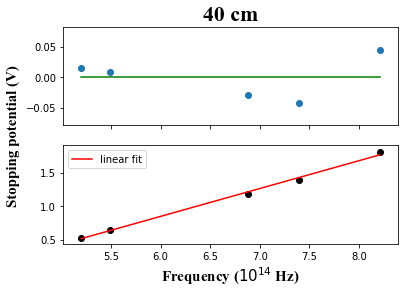

In [7]:
f, ax = plt.subplots(2, sharex = True)
f.add_subplot(111, frameon = False)
plt.tick_params(labelcolor = 'none', bottom = False, left = False)
plt.xlabel('Frequency ($10^{14}$ Hz)', fontname = 'Times New Roman', fontsize = 15)
plt.ylabel('Stopping potential (V)', fontname = 'Times New Roman', fontsize = 15, labelpad = 20)
plt.title('40 cm', fontname = 'Times New Roman', fontsize = '22')

ax[0].scatter(x, res)
ax[0].plot(lin, 10*[0], 'g')

ax[1].scatter(x, y, c = 'k')
ax[1].plot(lin, fitlin, 'r', label = "linear fit")

ax[1].legend()
plt.show()

# Part 1: 30 cm

In [8]:
y = R2

dx=delta(x)
m2=slope(x,y,dx)
print('slope:',m2)
c2=intercept(x,y,dx)
print('intercept:',c2)
cu=acu(x,y,m2,c2)
m2err=am(cu,x,dx)
print('error in gradient:',m2err)
c2err=ac(cu,x,dx)
print('error in the intercept:',c2err)

fit = np.polyval([m2,c2], x)
fitlin = np.polyval([m2,c2], lin)
res = y - fit

slope: 0.4174821277932103
intercept: -1.6552114000357514
error in gradient: 0.01565047020551974
error in the intercept: 0.10537744121553959


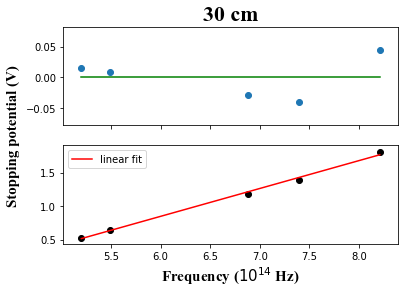

In [9]:
f, ax = plt.subplots(2, sharex = True)
f.add_subplot(111, frameon = False)
plt.tick_params(labelcolor = 'none', bottom = False, left = False)
plt.grid(False)
plt.xlabel('Frequency ($10^{14}$ Hz)', fontname = 'Times New Roman', fontsize = 15)
plt.ylabel('Stopping potential (V)', fontname = 'Times New Roman', fontsize = 15, labelpad = 20)
plt.title('30 cm', fontname = 'Times New Roman', fontsize = '22')

ax[0].scatter(x, res)
ax[0].plot(lin, 10*[0], 'g')

ax[1].scatter(x, y, c = 'k')
ax[1].plot(lin, fitlin, 'r', label = "linear fit")

ax[1].legend()
plt.show()

# Part 1: 20 cm

In [10]:
y = R3

dx=delta(x)
m3=slope(x,y,dx)
print('slope:',m3)
c3=intercept(x,y,dx)
print('intercept:',c3)
cu=acu(x,y,m3,c3)
m3err=am(cu,x,dx)
print('error in gradient:',m3err)
c3err=ac(cu,x,dx)
print('error in the intercept:',c3err)

fit = np.polyval([m3,c3], x)
fitlin = np.polyval([m3,c3], lin)
res = y - fit

slope: 0.3879589662752583
intercept: -1.5070957002026135
error in gradient: 0.006781141248682446
error in the intercept: 0.045658648201846445


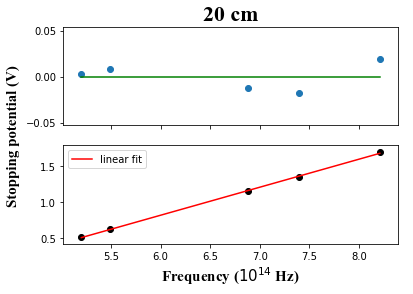

In [11]:
f, ax = plt.subplots(2, sharex = True)
f.add_subplot(111, frameon = False)
plt.tick_params(labelcolor = 'none', bottom = False, left = False)
plt.grid(False)
plt.xlabel('Frequency ($10^{14}$ Hz)', fontname = 'Times New Roman', fontsize = 15)
plt.ylabel('Stopping potential (V)', fontname = 'Times New Roman', fontsize = 15, labelpad = 20)
plt.title('20 cm', fontname = 'Times New Roman', fontsize = '22')

ax[0].scatter(x, res)
ax[0].plot(lin, 10*[0], 'g')

ax[1].scatter(x, y, c = 'k')
ax[1].plot(lin, fitlin, 'r', label = "linear fit")

ax[1].legend()
plt.show()

In [12]:
m = [m1,m2,m3]
merr = [m1err,m2err,m3err]
c = [c1,c2,c3]
cerr = [c1err,c2err,c3err]

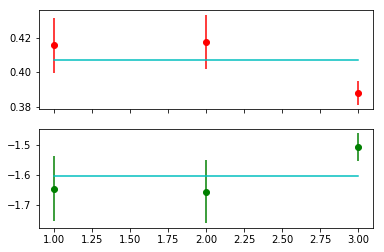

In [13]:
f, (ax1, ax2) = plt.subplots(2, sharex = True)

ax1.errorbar([1,2,3],m, yerr = merr, fmt = 'ro')
ax1.plot([1,2,3], [np.mean(m)]*3, 'c')

ax2.errorbar([1,2,3], c, yerr = cerr, fmt = 'go')
ax2.plot([1,2,3], [np.mean(c)]*3, 'c')
plt.show()

# Part 2: 2mm

In [76]:
R4 = np.transpose(np.loadtxt('p2_40cm_2mm.csv', delimiter = ','))
R5 = np.transpose(np.loadtxt('p2_40cm_4mm.csv', delimiter = ','))
R6 = np.transpose(np.loadtxt('p2_40cm_8mm.csv', delimiter = ','))

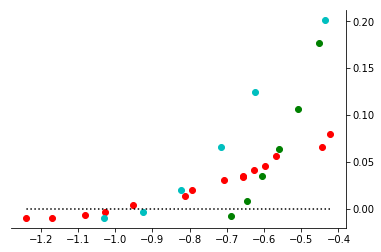

In [82]:
x = R4[1][len(R4[0])-15:]
y = [i*10**11 for i in R4[0][len(R4[0])-15:]]
x2 = R5[1][len(R5[0])-6:]
y2 = [i*10**11 for i in R5[0][len(R5[0])-6:]]
x3 = R6[1][len(R6[0])-11:-5]
y3 = [i*10**11 for i in R6[0][len(R6[0])-11:-5]]
f = plt.figure()
ax = f.add_subplot(111)
plt.plot(x,y,'ro',  label = '2mm')
plt.plot(x2,y2,'co', label = '4mm')
plt.plot(x3,y3,'go', label = '8mm')
plt.plot([x[0],x[-1]],2*[0], 'k:')
ax.yaxis.tick_right()
ax.spines['top'].set_color(None)
ax.spines['left'].set_color(None)
plt.savefig("zoom.png")
plt.show()

In [102]:
v = R1[1][2]
v=(299792458/(R1[0][2]*10**-9))
h = 4.135667662*10**-15
e = h*v
print(v,h,e)
print(e-1.5)

687597380733944.9 4.135667662000001e-15 2.843674251977278
1.3436742519772782
